In [7]:
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import state_fidelity,Statevector,SparsePauliOp
from qiskit.algorithms import SciPyRealEvolver,TimeEvolutionProblem
import plotly.express as px
import numpy as np
from fidlib.basicfunctions import create_heisenberg, evolve_circuit
from qiskit.quantum_info.operators import Operator
import plotly.graph_objects as go
import numpy as np

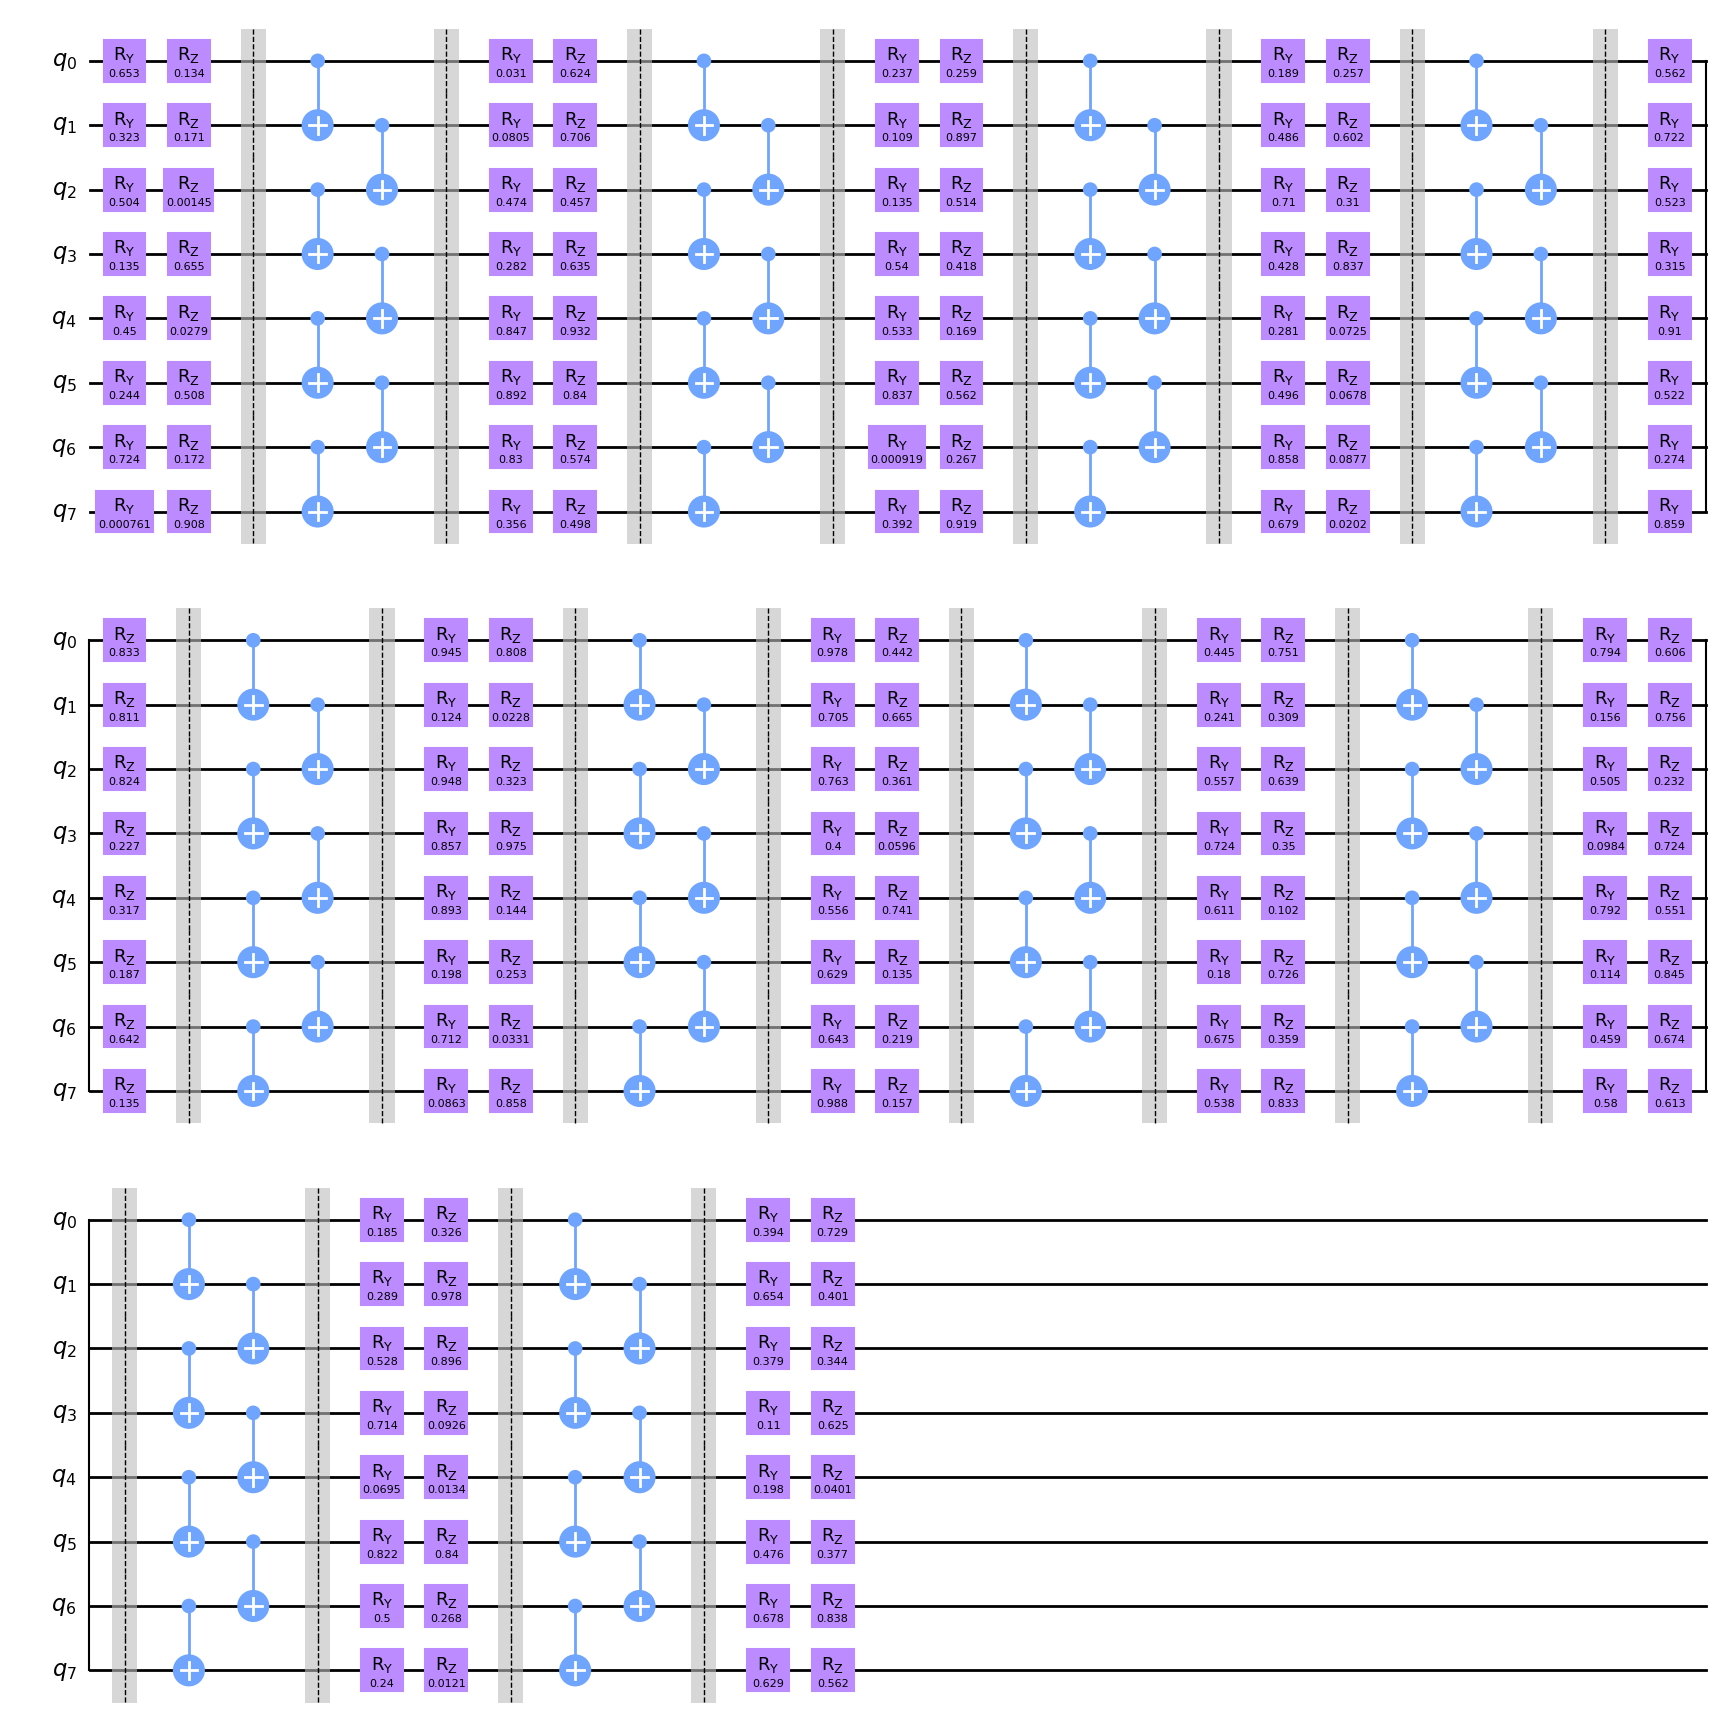

In [8]:
num_qubits=8
qc = EfficientSU2(num_qubits=num_qubits,insert_barriers=True,entanglement="pairwise",reps=10,su2_gates=["ry","rz"])
initial_parameters = np.random.rand(qc.num_parameters)
display(qc.decompose().assign_parameters(initial_parameters).draw(output='mpl'))

In [9]:
H = create_heisenberg(num_qubits=num_qubits,j_const=4.0,g_const=-1.0)
# display(H)


In [10]:
parameter_perturbation = np.random.rand(qc.num_parameters); parameter_perturbation /= np.linalg.norm(parameter_perturbation)
# parameter_perturbation = np.zeros(qc.num_parameters); parameter_perturbation[1]=1
eps = 3
epsilons =np.linspace(-eps,eps,100)
observables=[Operator(Statevector(qc.assign_parameters(initial_parameters+e*parameter_perturbation))) for e in epsilons]
solution = evolve_circuit(H=H,
            dt=0.1,
            qc=qc,
            initial_parameters=initial_parameters,
            observables=observables,
            num_timesteps=10
               )

In [11]:
infidelities = 1-np.array([so[0] for so in solution.observables]).real
solution.times

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [12]:
# Assuming data is your 2D numpy array
data = infidelities  # Replace this with your actual data

# Create steps for the slider, one for each slice along parameter 2
steps = []
for i in range(data.shape[1]):
    step = dict(
        method="restyle",
        args=[{"y": [data[:, i]]}],
        label=str(solution.times[i])
    )
    steps.append(step)

# Create an initial plot for the first slice of data along parameter 2
fig = go.Figure(
    data=[go.Scatter(x=epsilons,y=data[:, 0])],
    layout=go.Layout(
        title="Interactive Plot",
        xaxis_title="Epsilon",
        yaxis_title="Infidelity",
        sliders=[dict(
            active=0,
            pad={"t": 20},
            steps=steps
        )],
        yaxis_range=[0,1]
    )
)

# Display the interactive plot
fig.show()
